# Proyecto


En el proyecto vamos a utilizar un set de datos de tumores de seno para predecir si es benigno o maligno(cancerigeno o no). Este es un problema de clasificación binaria ya que solo tenemos dos clases, se va a implementar regresión logística y obtener la probabilidad de que el tumor sea maligno.

<img src="images/ai_cancer.png" width="300">

Según lo visto en la clase en este proyecto vamos a implementar los pasos del uno al cinco, vamos a exportar el modelo que será utilizado en el último paso por una aplicación móvil.


<img src="images/diagrama.png" width="700">

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import datetime
import helper

## Registro de Experimentos
En machine learning y ciencia de datos es importante mantener un registro de los resultados de cada experimento y los parámetros que utilizamos en el experimento.
En la siguiente celda Iniciamos la bitácora de experimentos, esta bitácora será almacenada en un archivo, esto nos permite cargar de nuevo los resultados si cerramos el notebook.

In [2]:
log_book = helper.load_log_book()

## Carnet estudiante

 En una variable deben ingresar su numero de carnet, para que al exportar el modelo el archivo se llame `carnet+"model.csv"`

In [3]:
carnet = "200818835"

## Breast Cancer Data Set
[Link al set de datos](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

#### Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link] 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. 

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

In [4]:
data = load_breast_cancer()

Este es un problema de clasificacion binario por que que existen solo dos posibles valores(predecimos tumores cancerigenos de seno)

In [5]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

El data set tiene varios features, por que debemos experimentar con diferentes features hasta obtener un buen resultado, en esta celda vamos a imprimir los nombres de las features.

En este [link](https://goo.gl/U2Uwz2) podemos encontrar mas información sobre las features.

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

muestra de 5 labels

In [7]:
data.target[0:5]

array([0, 0, 0, 0, 0])

las features para estos 5 casos

In [8]:
data.data[0:5,]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

# Implementacion de Regresion Logistica

## Hipotesis

Funcion Sigmoid:

$sig(t) = {\frac {1} {1 + e^{-t}}}$

combinamos la función sigmoid/lógistica con esta hipótesis conocida tenemos la nueva hipótesis para clasificación con regresión lógistica:

$z = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \ldots + \theta_{n}x_{n}$

$g(z) = {\frac {1} {1 + e^{-z}}}$

** Hipótesis para clasificación con regresión logística: **

$h_{\theta}(x) = {\frac {1} {1 + e^{-(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \ldots + \theta_{n}x_{n})}}}$

In [9]:
## Sigmoid 

def sigmoid(z):
    ### INICIO: TU CODIGO AQUI:  (~1 linea)###
    s = 
    ### FIN ##
    
    return s

In [10]:
### Validando nuestra funcion sigmoid
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


#### Resultados esperados

**sigmoid(0)** = 0.5

**sigmoid(9.2)** = 0.999898970806


Implementado la funcion de hipótesis para clasificación con regresión logística

** Hipótesis para clasificación con regresión logística: **

$h_{\theta}(x) = {\frac {1} {1 + e^{-(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \ldots + \theta_{n}x_{n})}}}$

In [11]:
def get_hipotesis(features, theta_values):
    ## Calculo de la hipotesis de froma vectorizada ##
    z = features.dot(theta_values)
    
    ### INICIO: TU CODIGO AQUI:  (~1 linea)###
    h = 
    ### FIN ##
    
    return h

## Costo

$J(\Theta) = - {\frac {1}{m}}\sum _{i=1}^{m} y \log(h(x)) + (1-y)\log(1-h(x))$

Utiliza la funcion log de numpy, Ejemplo:
`np.log(y)`

In [12]:
def costo(X, theta_vector, y):
    m = len(y)
    
    ### INICIO: TU CODIGO AQUI:  (~2 lineas)###
    y_hat = 
    
    costo = 
    ### FIN ##
    
    return costo

## Accuracy Score

Implementa la funcion de accuracy utlizando sklearn

In [13]:
def accuracy(X, theta_vector, y):

    hipotesis = get_hipotesis(X, theta_vector)
    
    # Convertimos el resultado probabilistico a deterministico (0 1)
    y_pred = [1 if (y >= 0.5) else 0 for y in hipotesis ]
    
    ### INICIO: TU CODIGO AQUI:  (~1 linea)###
    acc_score = 
    ### FIN ##
    
    return acc_score

## F1 Score

Implementa la funcion de f1_score utlizando sklearn

In [14]:
def f1(X, theta_vector, y):

    hipotesis = get_hipotesis(X, theta_vector)

    # Convertimos el resultado probabilistico a deterministico (0 1)    
    y_pred = [1 if (y >= 0.5) else 0 for y in hipotesis ]
    
    ## INICIO: TU CODIGO AQUI:  (~1 linea)###
    f1 = 
    ### FIN ##
    
    return f1

## Precision Score

Implementa la funcion de f1_score utlizando sklearn

In [15]:
def precision(X, theta_vector, y):

    hipotesis = get_hipotesis(X, theta_vector)

    # Convertimos el resultado probabilistico a deterministico (0 1)    
    y_pred = [1 if (y >= 0.5) else 0 for y in hipotesis ]
    
    ## INICIO: TU CODIGO AQUI:  (~1 linea)###
    precision = 
    ### FIN ##
    
    return precision

## Recall Score

Implementa la funcion de recall_score utlizando sklearn

In [16]:
def recall(X, theta_vector, y):

    hipotesis = get_hipotesis(X, theta_vector)

    # Convertimos el resultado probabilistico a deterministico (0 1)    
    y_pred = [1 if (y >= 0.5) else 0 for y in hipotesis ]
    
    ## INICIO: TU CODIGO AQUI:  (~1 linea)###
    reacall = 
    ### FIN ##
    
    return recall

### Estandarización o Z-score Normalizacion 

El objetivo es cambiar la escala de las features a modo que tengan las propiedades de una distribución estadar normal. Se calcula de la siguiente manera:

$z = {\frac {x - \mu} {\sigma}}$

Donde $\mu$ es la media y $\sigma$ es la desviacion estandard

Implementa la funcion de normalizacion sin utlizar sklearn solo puedes utilizar numpy.

Para utilizar la columna de features, utilizamos `features[:,i]`

In [17]:
def normalizar(features):
    std = 1
    media = 0
    
    # Utilizamos el ciclo, para normalizar cada feature(una iteracion por feature)
    for i in list(range(0, features.shape[1])):
        ### INICIO: TU CODIGO AQUI:  (~3 lineas)###
        std = 
        media = 
        features[:,i] = 
        ### FIN ##
    return features

## Prediccion

Esta función la vamos a utilizar para predecir con nuestro test set, no hay que cambiar nada del código, solo ejecuta la celda.

In [18]:
def prediccion(x, theta_vector, normalizar_valores):
    numero_features = x.shape[1] + 1
    
    if (normalizar_valores):
        x = normalizar(x)
    
    x_features = np.ones((x.shape[0], numero_features))
    x_features[:,:-1] = x

    
    y_hat = get_hipotesis(x_features, theta_vector)
    
    return np.array([1 if (y >= 0.5) else 0 for y in y_hat])

## Gradient Descent

Repetir{

$\theta_{j} := \theta _{j} - \alpha {\frac {1}{m}} \sum _{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_{j}$

}
        
Simultaneamente para cada $j = 0,\ldots,n $

In [19]:
def gradient_descent(X, y, theta_vector, alpha, iterations, X_test, y_test, nombre_modelo):
    global log_book
    m = len(y) 

    ## Cost vector
    cost_vect = []
    accuracy_vect = []
    accuracy_vect_test = []
    
    for iteration in range(iterations):
        '''
        IMPLELEMTA TU CODIGO AQUI, llama a la funcion para calcular la hipotesis
        que se implemento mas arriba. Parametros matriz de features X y el vector
        con los valores Theta (~1 linea)
        '''
        hipotesis = 


        theta_vector_temp = []
        for i, theta in enumerate(theta_vector):
            '''
            IMPLELEMTA TU CODIGO AQUI, adentro de este ciclo vamos a calcular
            elnuevo valor de Theta[i], utilizando la formula de la celda de arriba
            Recuerda que para multiplicar por utilizamos X[:,i]  (~1 linea)
            '''
            nuevo_theta =  

            ### aqui agregamos el nuevo valor the theta[i] a un vector temporal
            theta_vector_temp.append(nuevo_theta)


        ## Actualizamos el vector theta con los nuevos valores
        theta_vector = theta_vector_temp

        '''
        IMPLELEMTA TU CODIGO AQUI, llama a la funcion de costo (~1 linea)
        '''
        cost = 
        
        '''
        IMPLELEMTA TU CODIGO AQUI, utiliza Accuracy que se definio arriba (~1 linea)
        '''
        acc_score = 
        
        '''
        IMPLELEMTA TU CODIGO AQUI, utiliza f1 score que se definio arriba (~1 linea)
        '''
        f1_training = 

        '''
        IMPLELEMTA TU CODIGO AQUI, utiliza precision score que se definio arriba (~1 linea)
        '''
        precision_training = 
        
        '''
        IMPLELEMTA TU CODIGO AQUI, utiliza recal score que se definio arriba (~1 linea)
        '''
        recall_training = 
        
        
        ## Test Set score, este codigo no hay que cambiarlo ####
        y_predict = prediccion(X_test, theta_vector, True)
        acc_test = accuracy_score(y_predict, y_test)
        accuracy_vect_test.append(acc_test)
        f1_score_test = f1_score(y_predict, y_test)
        precision_test = precision_score(y_test, y_predict)
        recall_test = recall_score(y_test, y_predict)
        
        ## Guardando el valor del costo para graficarlo, este codigo no hay que cambiarlo ##
        cost_vect.append(cost)
        accuracy_vect.append(acc_score)
        
        n = 50 ### Ingresa aqui cada cuantas iteraciones quieres que se imprima el valor de las metricas ###
        
        ## Este codigo no hay que modificarlo ##
        if(iteration % n == 0):
            print('#####################')
            print('TRAINING: [Iteracion: ', iteration,' Costo: ', cost, \
                  ' Accuracy:', acc_score,' F1 Score:',f1_training, \
                  'Precision training:', precision_training, 'Recall training:', recall_training,']')
            print('TEST: [Iteracion: ', iteration,'Accuracy:', acc_test, \
                  ' F1 Score:', f1_score_test, 'Precision Test:', precision_test,'Recall Test:', recall_test,']')
        
    ## Log book, este codigo no hay que cambiarlo ##
    nombre_modelo = nombre_modelo + '_'+datetime.datetime.now().strftime("%d%H%M%f")
    numero_features = X.shape[1] - 1
    experiment = np.array([nombre_modelo, numero_features, m, alpha, iterations, accuracy_vect[-1], \
                           accuracy_vect_test[-1], f1_score_test, precision_test, \
                           recall_test,theta_vector], dtype=object)
    log_book = np.vstack([log_book, experiment])
        
    return theta_vector, cost_vect, accuracy_vect,accuracy_vect_test


## Dividimos la data en training y test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=42)

In [21]:
X_train.shape

(426, 30)

# Entrenamiento

A continuación vamos a entrenar 5 modelos, vamos a utilizar las funciones que creamos en en notebook.
Es importante experimentar con diferentes features, en este proyecto como maximo vamos a utilizar 5 features. Tambien vamos a utilizar difertene numero de ejemplos en el set de datos, diferente numero de iteraciones y diferente learning rate.

En este proyecto solo vamos a utilizar las primeras 5 features  en este orden:

`['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness']`

Se utilizaran únicamente estas features en ese orden para el modelo que vamos a exportar, ya que estas features son las entradas de datos en interfaz de la aplicación que consumirá nuestro modelo. 

En algunos modelos podemos experimentar y utilizar mas de cinco features, pero es importante tomar en cuenta que el que se va a exportar tenga las cinco features de la lista.

El entrenamiento se compone básicamente de tres pasos, sampleo bootstrap, escoger las features y ejecutar el entrenamiento llamando a la función de gradient descent. 
En el primer paso vamos a utilizar la función resample para hacer un sampleo del set de datos de entrenamiento, debemos definir el numero de samples que queremos utilizar.
En el segundo paso, en un arreglo vamos a definir el nombre de las features que queremos utilizar para entrenar el modelo.
En el tercer paso ejecutamos la función gradient descent.

Por ultimo vamos a obtener el accuracy del modelo y vamos a imprimir la matriz de confusión, imprimiremos el precisión y el recall del modelo para entender mejor los resultados y tener una mejor idea de que tan bien clasifica nuestro modelo.

## Entrenamiento modelo 1

#### Sampleo bootstrap

In [22]:
X_train_m1, Y_train_m1 = resample(X_train, y_train, n_samples = 150)

### Filtrar Features
Solo seleccionar los features

In [23]:
'''
Ingresa en la lista el nombre de las fatrues que quieres utlizar en este modelo (~1 linea)
'''
features_filtro = ['mean radius', 'mean smoothness']

In [24]:
X_train_m1 = helper.fitrar_nombre(X_train_m1,data.feature_names,features_filtro)
X_test_features = helper.fitrar_nombre(X_test,data.feature_names,features_filtro)

In [25]:
X_train_m1.shape

(150, 2)

In [26]:
X_test_features.shape

(143, 2)

In [27]:
## Numero de iteracions ##
iterations = 500  # Define el numero de iteraciones #

## Alpha ##
alpha = 0.01 # Define el valor de alpha #

#### No hay que cambiar el codigo despues de esta linea #####
## Numero de feautres ##
numero_features = X_train_m1.shape[1] + 1

## Creamos un vector donde se almacenan los valores de Theta,
## lo inicializamos con numeros aleatorios
theta_vector = np.random.rand(numero_features)

## Normaliza las features de X_train_features (~1 linea) ##
X_train_m1 = 

# Creando la Matriz X de features, 
# utilizamos np.ones para agregar el valor constante '1' que es el bias o feature 0
X_train_features = np.ones((X_train_m1.shape[0], numero_features))
X_train_features[:,:-1] = X_train_m1

#####################
TRAINING: [Iteracion:  0  Costo:  1.0589882133843296  Accuracy: 0.5333333333333333  F1 Score: 0.6956521739130435 Precision training: 0.5555555555555556 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  0 Accuracy: 0.5664335664335665  F1 Score: 0.7232142857142857 Precision Test: 0.6044776119402985 Recall Test: 0.9 ]
#####################
TRAINING: [Iteracion:  50  Costo:  0.9168194674841474  Accuracy: 0.5733333333333334  F1 Score: 0.728813559322034 Precision training: 0.5733333333333334 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  50 Accuracy: 0.6223776223776224  F1 Score: 0.7672413793103449 Precision Test: 0.6267605633802817 Recall Test: 0.9888888888888889 ]
#####################
TRAINING: [Iteracion:  100  Costo:  0.797088326073779  Accuracy: 0.5733333333333334  F1 Score: 0.728813559322034 Precision training: 0.5733333333333334 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  100 Accuracy: 0.629

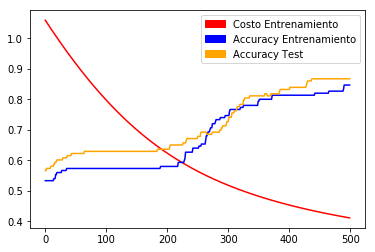

In [28]:
modelo_1_theta_values, cost_vect, acc_vect, acc_vect_test = \
gradient_descent(X_train_features, Y_train_m1, theta_vector, alpha, iterations, X_test_features, y_test, 'modelo_1')

In [ ]:
## Funcion para graficar el costo y  accuracy durante cada iteracion ##
helper.training_graph(cost_vect, acc_vect, acc_vect_test)

### Accuracy y Matriz de confusion Training Set

![alt text](https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

In [29]:
y_hat = get_hipotesis(X_train_features, modelo_1_theta_values)
y_predict = np.array([1 if (y > 0.5) else 0 for y in y_hat])

print('Accuracy:', accuracy_score(Y_train_m1,y_predict) * 100 ,'%')
print()
print('Matriz de confusion')
confusion_matrix(Y_train_m1, y_predict )

Accuracy: 84.66666666666667 %

Matriz de confusion


array([[41, 23],
       [ 0, 86]])

#### Accuracy con el Test set

In [30]:
y_predict = prediccion(X_test_features, modelo_1_theta_values, True)

In [31]:
print('Accuracy:',accuracy_score(y_test, y_predict)* 100 ,'%')

Accuracy: 86.7132867132867 %


#### Matriz de confusion Test Set

In [32]:
confusion_matrix(y_test, y_predict)

array([[37, 16],
       [ 3, 87]])

In [33]:
print('precision: ',precision_score(y_test, y_predict))

print('recall: ', recall_score(y_test, y_predict))

precision:  0.8446601941747572
recall:  0.9666666666666667


## Entrenamiento modelo 2

#### Sampleo bootstrap

In [34]:
'''
Ingresa en la lista el nombre de las fatrues que quieres utlizar en este modelo (~1 linea)
'''
X_train_m2, Y_train_m2 = resample(X_train, y_train, n_samples = 400)

### Filtrar Features
Solo seleccionar los features

In [35]:
features_filtro = ['mean perimeter', 'mean area','mean smoothness']

In [36]:
X_train_m2 = helper.fitrar_nombre(X_train_m2,data.feature_names,features_filtro)
X_test_features = helper.fitrar_nombre(X_test,data.feature_names,features_filtro)

In [37]:
## Numero de iteracions ##
iterations = 1000  # Define el numero de iteraciones #

## Alpha ##
alpha = 0.05 # Define el valor de alpha #

#### No hay que cambiar el codigo despues de esta linea #####
## Numero de feautres ##
numero_features = X_train_m2.shape[1] + 1

## Creamos un vector donde se almacenan los valores de Theta,
## lo inicializamos con numeros aleatorios
theta_vector = np.random.rand(numero_features)

## Normaliza las features de X_train_features (~1 linea) ##
X_train_m2 = 

# Creando la Matriz X de features, 
# utilizamos np.ones para agregar el valor constante '1' que es el bias o feature 0
X_train_features = np.ones((X_train_m2.shape[0], numero_features))
X_train_features[:,:-1] = X_train_m2

#####################
TRAINING: [Iteracion:  0  Costo:  1.3222912170099925  Accuracy: 0.2025  F1 Score: 0.3312368972746331 Precision training: 0.3798076923076923 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  0 Accuracy: 0.25874125874125875  F1 Score: 0.40449438202247195 Precision Test: 0.4090909090909091 Recall Test: 0.4 ]
#####################
TRAINING: [Iteracion:  50  Costo:  0.45549861830303295  Accuracy: 0.82  F1 Score: 0.881578947368421 Precision training: 0.7905604719764012 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  50 Accuracy: 0.7972027972027972  F1 Score: 0.8612440191387559 Precision Test: 0.7563025210084033 Recall Test: 1.0 ]
#####################
TRAINING: [Iteracion:  100  Costo:  0.32082690367146877  Accuracy: 0.91  F1 Score: 0.9368421052631578 Precision training: 0.8870431893687708 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  100 Accuracy: 0.8881118881118881  F1 Score: 0.9183673469387755 Preci

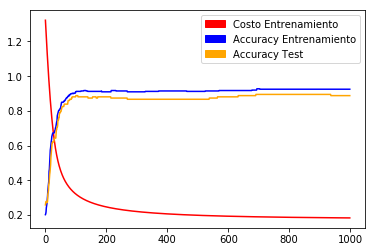

In [38]:
## Llama a la funcion de gradient descent, recurda definir un nombre diferente para el modelo (~1 linea) ##
modelo_2_theta_values, cost_vect, acc_vect, acc_vect_test = 
### FIN ##

In [ ]:
## Funcion para graficar el costo y  accuracy durante cada iteracion ##
helper.training_graph(cost_vect, acc_vect, acc_vect_test)

#### Accuracy con el Test set [Modelo 2]

In [39]:
y_predict = prediccion(X_test_features, modelo_2_theta_values, True)

In [40]:
print('Accuracy:',accuracy_score(y_test, y_predict)* 100 ,'%')

Accuracy: 88.81118881118881 %


#### Matriz de confusion Test Set [Modelo 2]

In [41]:
confusion_matrix(y_test, y_predict)

array([[43, 10],
       [ 6, 84]])

In [42]:
print('precision: ',precision_score(y_test, y_predict))

print('recall: ', recall_score(y_test, y_predict))

precision:  0.8936170212765957
recall:  0.9333333333333333


## Entrenamiento modelo 3

#### Sampleo bootstrap

In [43]:
X_train_m3, Y_train_m3 = resample(X_train, y_train, n_samples = 460)

### Filtrar Features
Solo seleccionar los features

In [44]:
'''
Ingresa en la lista el nombre de las fatrues que quieres utlizar en este modelo (~1 linea)
'''
features_filtro = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

In [45]:
X_train_m3 = helper.fitrar_nombre(X_train_m3,data.feature_names,features_filtro)
X_test_features = helper.fitrar_nombre(X_test,data.feature_names,features_filtro)

In [46]:
## Numero de iteracions ##
iterations = 1500  # Define el numero de iteraciones #

## Alpha ##
alpha = 0.02 # Define el valor de alpha #

#### No hay que cambiar el codigo despues de esta linea #####
## Numero de feautres ##
numero_features = X_train_m3.shape[1] + 1

## Creamos un vector donde se almacenan los valores de Theta,
## lo inicializamos con numeros aleatorios
theta_vector = np.random.rand(numero_features)

## Normaliza las features de X_train_features (~1 linea) ##
X_train_m3 = 

# Creando la Matriz X de features, 
# utilizamos np.ones para agregar el valor constante '1' que es el bias o feature 0
X_train_features = np.ones((X_train_m3.shape[0], numero_features))
X_train_features[:,:-1] = X_train_m3

#####################
TRAINING: [Iteracion:  0  Costo:  1.058670774977082  Accuracy: 0.55  F1 Score: 0.7096774193548387 Precision training: 0.6067146282973621 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  0 Accuracy: 0.5244755244755245  F1 Score: 0.6880733944954128 Precision Test: 0.5859375 Recall Test: 0.8333333333333334 ]
#####################
TRAINING: [Iteracion:  50  Costo:  0.5849123696537283  Accuracy: 0.6673913043478261  F1 Score: 0.7946308724832215 Precision training: 0.6592427616926503 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  50 Accuracy: 0.6503496503496503  F1 Score: 0.782608695652174 Precision Test: 0.6428571428571429 Recall Test: 1.0 ]
#####################
TRAINING: [Iteracion:  100  Costo:  0.439702312701081  Accuracy: 0.8  F1 Score: 0.8654970760233918 Precision training: 0.7628865979381443 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  100 Accuracy: 0.8181818181818182  F1 Score: 0.87378640776

#####################
TRAINING: [Iteracion:  1100  Costo:  0.28027452828935395  Accuracy: 0.8847826086956522  F1 Score: 0.9157392686804452 Precision training: 0.8648648648648649 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  1100 Accuracy: 0.8811188811188811  F1 Score: 0.9090909090909091 Precision Test: 0.8762886597938144 Recall Test: 0.9444444444444444 ]
#####################
TRAINING: [Iteracion:  1150  Costo:  0.2796540023267969  Accuracy: 0.8913043478260869  F1 Score: 0.9201277955271565 Precision training: 0.8727272727272727 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  1150 Accuracy: 0.8811188811188811  F1 Score: 0.9090909090909091 Precision Test: 0.8762886597938144 Recall Test: 0.9444444444444444 ]
#####################
TRAINING: [Iteracion:  1200  Costo:  0.2790954030340483  Accuracy: 0.8913043478260869  F1 Score: 0.9201277955271565 Precision training: 0.8727272727272727 Recall training: <function recall at 0x1136a5158> ]
TEST: [I

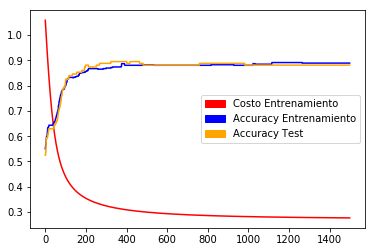

In [47]:
## Llama a la funcion de gradient descent, recurda definir un nombre diferente para el modelo (~1 linea) ##
modelo_3_theta_values, cost_vect, acc_vect, acc_vect_test = 
### FIN 

In [ ]:
## Funcion para graficar el costo y  accuracy durante cada iteracion
helper.training_graph(cost_vect, acc_vect, acc_vect_test)

#### Accuracy con el Test set [Modelo 3]

In [48]:
y_predict = prediccion(X_test_features, modelo_3_theta_values, True)

In [49]:
print('Accuracy:',accuracy_score(y_test, y_predict)* 100 ,'%')

Accuracy: 88.11188811188812 %


#### Matriz de confusion Test Set [Modelo 3]

In [50]:
confusion_matrix(y_test, y_predict)

array([[41, 12],
       [ 5, 85]])

In [51]:
print('precision: ',precision_score(y_test, y_predict))

print('recall: ', recall_score(y_test, y_predict))

precision:  0.8762886597938144
recall:  0.9444444444444444


## Entrenamiento modelo 4

#### Sampleo bootstrap

In [52]:
X_train_m4, Y_train_m4 = resample(X_train, y_train, n_samples = 460)

### Filtrar Features
Solo seleccionar los features

In [53]:
'''
Ingresa en la lista el nombre de las fatrues que quieres utlizar en este modelo (~1 linea)
'''
features_filtro = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness']

In [54]:
X_train_m4 = helper.fitrar_nombre(X_train_m4,data.feature_names,features_filtro)
X_test_features = helper.fitrar_nombre(X_test,data.feature_names,features_filtro)

In [55]:
## Numero de iteracions ##
iterations = 1000 # Define el numero de iteraciones #

## Alpha ##
alpha = 0.03 # Define el valor de alpha #

#### No hay que cambiar el codigo despues de esta linea #####
## Numero de feautres ##
numero_features = X_train_m4.shape[1] + 1

## Creamos un vector donde se almacenan los valores de Theta,
## lo inicializamos con numeros aleatorios
theta_vector = np.random.rand(numero_features)

## Normaliza las features de X_train_features (~1 linea) ##
X_train_m4 = normalizar(X_train_m4)

# Creando la Matriz X de features
X_train_features = np.ones((X_train_m4.shape[0], numero_features))
X_train_features[:,:-1] = X_train_m4

#####################
TRAINING: [Iteracion:  0  Costo:  1.5916906589632247  Accuracy: 0.2826086956521739  F1 Score: 0.42906574394463665 Precision training: 0.43356643356643354 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  0 Accuracy: 0.26573426573426573  F1 Score: 0.41340782122905023 Precision Test: 0.4157303370786517 Recall Test: 0.4111111111111111 ]
#####################
TRAINING: [Iteracion:  50  Costo:  0.5024526216137  Accuracy: 0.6826086956521739  F1 Score: 0.8 Precision training: 0.6666666666666666 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  50 Accuracy: 0.6713286713286714  F1 Score: 0.7929515418502203 Precision Test: 0.656934306569343 Recall Test: 1.0 ]
#####################
TRAINING: [Iteracion:  100  Costo:  0.31497406476026774  Accuracy: 0.8956521739130435  F1 Score: 0.9240506329113923 Precision training: 0.8588235294117647 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  100 Accuracy: 0.88811188811188

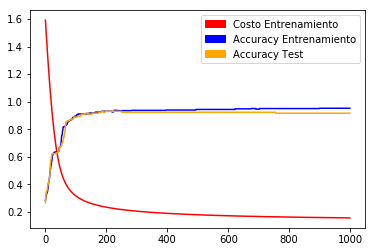

In [56]:
## Llama a la funcion de gradient descent, recurda definir un nombre diferente para el modelo (~1 linea) ##
modelo_4_theta_values, cost_vect, acc_vect, acc_vect_test = 

In [ ]:
## Funcion para graficar el costo y  accuracy durante cada iteracion ##
helper.training_graph(cost_vect, acc_vect, acc_vect_test)

#### Accuracy con el Test set [Modelo 4]

In [57]:
y_predict = prediccion(X_test_features, modelo_4_theta_values, True)

In [58]:
print('Accuracy:',accuracy_score(y_test, y_predict)* 100 ,'%')

Accuracy: 91.6083916083916 %


#### Matriz de confusion Test Set [Modelo 4]

In [59]:
confusion_matrix(y_test, y_predict)

array([[45,  8],
       [ 4, 86]])

In [60]:
print('precision: ',precision_score(y_test, y_predict))

print('recall: ', recall_score(y_test, y_predict))

precision:  0.9148936170212766
recall:  0.9555555555555556


## Entrenamiento modelo 5

#### Sampleo bootstrap

In [61]:
X_train_m5, Y_train_m5 = resample(X_train, y_train, n_samples = 460)

### Filtrar Features
Solo seleccionar los features

In [62]:
'''
Ingresa en la lista el nombre de las fatrues que quieres utlizar en este modelo (~1 linea)
'''
features_filtro = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness']

In [63]:
X_train_m5 = helper.fitrar_nombre(X_train_m5,data.feature_names,features_filtro)
X_test_features = helper.fitrar_nombre(X_test,data.feature_names,features_filtro)

In [64]:
## Numero de iteracions ##
iterations = 2000 # Define el numero de iteraciones #

## Alpha ##
alpha = 0.005 # Define el valor de alpha #

#### No hay que cambiar el codigo despues de esta linea #####
## Numero de feautres ##
numero_features = X_train_m5.shape[1] + 1

## Creamos un vector donde se almacenan los valores de Theta,
## lo inicializamos con numeros aleatorios
theta_vector = np.random.rand(numero_features)

## Normaliza las features de X_train_features (~1 linea) ##
X_train_m5 = normalizar(X_train_m5)

# Creando la Matriz X de features
X_train_features = np.ones((X_train_m5.shape[0], numero_features))
X_train_features[:,:-1] = X_train_m5

#####################
TRAINING: [Iteracion:  0  Costo:  2.1872359628615214  Accuracy: 0.15  F1 Score: 0.23483365949119372 Precision training: 0.26200873362445415 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  0 Accuracy: 0.1888111888111888  F1 Score: 0.30120481927710846 Precision Test: 0.32894736842105265 Recall Test: 0.2777777777777778 ]
#####################
TRAINING: [Iteracion:  50  Costo:  1.8247396012031176  Accuracy: 0.18695652173913044  F1 Score: 0.299625468164794 Precision training: 0.31746031746031744 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  50 Accuracy: 0.1888111888111888  F1 Score: 0.3095238095238095 Precision Test: 0.3333333333333333 Recall Test: 0.28888888888888886 ]
#####################
TRAINING: [Iteracion:  100  Costo:  1.5000781693236689  Accuracy: 0.24782608695652175  F1 Score: 0.38652482269503546 Precision training: 0.38652482269503546 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  100 Ac

#####################
TRAINING: [Iteracion:  1150  Costo:  0.25825066610847236  Accuracy: 0.9239130434782609  F1 Score: 0.9411764705882353 Precision training: 0.8945686900958466 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  1150 Accuracy: 0.9230769230769231  F1 Score: 0.9417989417989419 Precision Test: 0.898989898989899 Recall Test: 0.9888888888888889 ]
#####################
TRAINING: [Iteracion:  1200  Costo:  0.2536541729259504  Accuracy: 0.9282608695652174  F1 Score: 0.9443507588532883 Precision training: 0.9003215434083601 Recall training: <function recall at 0x1136a5158> ]
TEST: [Iteracion:  1200 Accuracy: 0.9230769230769231  F1 Score: 0.9417989417989419 Precision Test: 0.898989898989899 Recall Test: 0.9888888888888889 ]
#####################
TRAINING: [Iteracion:  1250  Costo:  0.24941933625401394  Accuracy: 0.9282608695652174  F1 Score: 0.9443507588532883 Precision training: 0.9003215434083601 Recall training: <function recall at 0x1136a5158> ]
TEST: [It

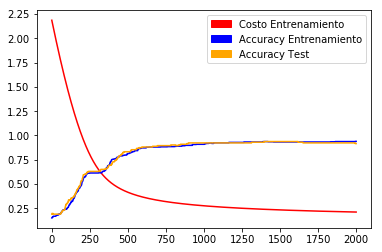

In [65]:
## Llama a la funcion de gradient descent, recurda definir un nombre diferente para el modelo (~1 linea) ##
modelo_5_theta_values, cost_vect, acc_vect, acc_vect_test = 

In [ ]:
## Funcion para graficar el costo y  accuracy durante cada iteracion ##
helper.training_graph(cost_vect, acc_vect, acc_vect_test)

#### Accuracy con el Test set [Modelo 5]

In [66]:
y_predict = prediccion(X_test_features, modelo_4_theta_values, True)

In [67]:
print('Accuracy:',accuracy_score(y_test, y_predict)* 100 ,'%')

Accuracy: 91.6083916083916 %


#### Matriz de confusion Test Set [Modelo 5]

In [68]:
confusion_matrix(y_test, y_predict)

array([[45,  8],
       [ 4, 86]])

In [69]:
print('precision: ',precision_score(y_test, y_predict))

print('recall: ', recall_score(y_test, y_predict))

precision:  0.9148936170212766
recall:  0.9555555555555556


# Comparacion de Modelos
Es importante llevar un registro de los resultados de nuestros modelos y los hyperparametros que utilizamos, para ir comparando y ajustando los modelos. En nuestra función de gradient descent esta implementado un registro, que almacena cada ejecucion de la funcion.

Este registro almacena datos que nos van a servir para comprar los modelos y tambien almacena los valores theta del modelo, por lo que podemos guardar los modelos y utlizarlos despues.
A continuacion vamos a desplegar en la siguiente celta y nos va ayudar a tomar una decisión de cual es el mejor modelo.

Es recomendable que, luego de analizar los resultados del registro ejecutemos de nuevo alguno de los modelos cambiando los hyperparametros o numero de ejemplos y ver con cuales obtenemos mejores resultados.

Podemos ejecutar la funcion `helper.guardar_log_book(log_book)` para almacenar en disco los modelos.

Para el ultimo paso donde exportamos el modelo debemos utilizar la funcion `helper.filter_log_book(log_book, nombre_modelo)` para obtener el mejor modelo y exportalo.

In [70]:
helper.print_log_book(log_book)

,Nombre Modelo,Numero de features,Numero de ejemplos,Alpha,Numero de Iteraciones,Accuracy Training,Accuracy Test,F1 score Test,Precision Test,Recall Test
0,modelo_1_241301677789,2,150,0.010,500,0.846667,0.867133,0.901554,0.844660,0.966667
1,modelo_2_241301271440,3,400,0.050,1000,0.925000,0.888112,0.913043,0.893617,0.933333
2,modelo_3_241302648088,4,460,0.020,1500,0.889130,0.881119,0.909091,0.876289,0.944444
3,modelo_4_241302661042,5,460,0.030,1000,0.952174,0.916084,0.934783,0.914894,0.955556
4,modelo_5_241302513542,5,460,0.005,2000,0.939130,0.916084,0.934783,0.914894,0.955556


### Guardando la bitacora

In [71]:
helper.guardar_log_book(log_book)

## Exportar el modelo

Vamos a exportar el modelo para poder hacer deploy, ** el modelo debe tener las cinco primeras feautures **.

Selecciona tu mejor modelo:

### Seleccionamos el mejor modelo

Para seleccionar un modelo utilizamos la funcion `helper.filter_log_book()`.

Esta funcion recibe de parametros la bitacora y el nombre del modelo

`helper.filter_log_book(log_book, <nombre de nuestro mejor modelo>)`

In [73]:
### INICIO: TU CODIGO AQUI:  (~1 linea)###
modelo = 

print(modelo)

[-0.579942082118287, -0.5782684298041014, -0.8584656199514131, -0.9357509965462952, -0.6622850346447592, 0.5771268525195491]


Se va a utilizar el siguiente codigo para guardar el modelo en un archivo.
No hay que cambiar nada de codigo, solo hay que ejecutar la celda para exportar nuestro modelo

In [83]:
import csv

def exportar_modelo(model,carnet):
    norm_std, norm_media = helper.get_normalizacion_vales(X_train[:,0:5])
    with open(carnet + '_model.csv', 'w') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        filewriter.writerow(model)
        
    with open(carnet + '_momentos.csv', 'w') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        filewriter.writerow(norm_std)
        filewriter.writerow(norm_media)
        
    print('El modelo ha sido exportado [',csvfile.name,']')
    
exportar_modelo(modelo,carnet)

<img src="images/ai_cancer.png" width="700">